In [1]:
import os
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
!pip install slideio
import slideio
# slideio documentation: https://towardsdatascience.com/slideio-a-new-python-library-for-reading-medical-images-11858a522059

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 10.4 MB/s eta 0:00:00


Download the dataset in the workspace:

In [ ]:
#downloading data to workspace and renaming the training and testing folders

!gdown 1G54vsOdxWY1hG7dzmkeK3r0xz9s-heyQ -O /content/MoNuSAC_Testing_Data_and_Annotations.zip #download
#!unzip -j /content/MoNuSAC_Testing_Data_and_Annotations.zip -d /content/MoNuSAC_Testing_Data_and_Annotations
!unzip /content/MoNuSAC_Testing_Data_and_Annotations.zip #-d /content/MoNuSAC_Testing_Data_and_Annotations

!gdown 1lxMZaAPSpEHLSxGA9KKMt_r-4S8dwLhq -O /content/MoNuSAC_Training_Data_and_Annotations.zip
#!unzip -j /content/MoNuSAC_Training_Data_and_Annotations.zip -d /content/MoNuSAC_Training_Data_and_Annotations
!unzip /content/MoNuSAC_Training_Data_and_Annotations.zip #-d /content/MoNuSAC_Training_Data_and_Annotations


os.rename("MoNuSAC_images_and_annotations", "MoNuSAC_Training_Data_and_Annotations")
os.rename("MoNuSAC Testing Data and Annotations", "MoNuSAC_Testing_Data_and_Annotations")

In [ ]:
# try:
#   os.mkdir('training_data')
# except FileExistsError:
#   print('Directory already exsists')

# out_folder_name = '/content/training_data'
# os.chdir('/content/drive/MyDrive/MoNuSAC_images_and_annotations')

# for folder_name in os.listdir():
#   os.chdir('/content/drive/MyDrive/MoNuSAC_images_and_annotations/' + str(folder_name))
#   for file_name in os.listdir():
#     if file_name.endswith('.tif'):
#       out_file_path = os.path.join(out_folder_name, file_name)
#       out_file_path = out_file_path.replace('.tif', '')
#       data= np.array(Image.open(file_name))
#       file = np.save(out_file_path, data)

# for folder_name in os.listdir():
#   os.chdir('/content/drive/MyDrive/MoNuSAC_images_and_annotations/' + str(folder_name))
#   for file_name in os.listdir():
#     if file_name.endswith('.svs'):
#       out_file_path = os.path.join(out_folder_name, file_name)
#       out_file_path = out_file_path.replace('.svs', '')
#       slide = slideio.open_slide(file_name,"SVS")
#       scene = slide.get_scene(0)
#       image = scene.read_block(
#           #size=(500,0) # un-comment to downscale the images
#           )
#       data = np.asarray(image)
#       # file = np.save(out_file_path, data)

#### Analysing the files in the dataset

(766, 570, 3)

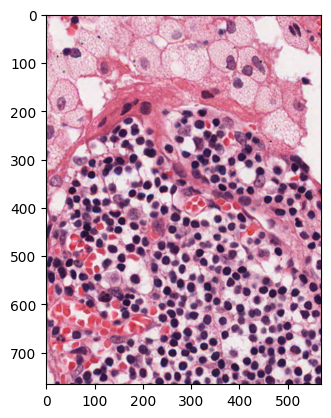

In [ ]:
os.chdir(r'/content/MoNuSAC_Training_Data_and_Annotations/TCGA-86-8672-01Z-00-DX1')
# Opening and viewing an SVS file
filename = 'TCGA-86-8672-01Z-00-DX1_1.svs'
slide = slideio.open_slide(filename,"SVS")
scene = slide.get_scene(0)
image = scene.read_block(
    #size=(500,0)
    )
plt.imshow(image, cmap = 'gray')
image.shape

In [ ]:
# Opening and viewing a TIF file
# WARNING: does not open multichannel

filename = r'/content/TCGA-69-7760-01Z-00-DX1/TCGA-69-7760-01Z-00-DX1_001/Lymphocyte/204_mask.tif'
im = Image.open(filename)
im.show()
# to numpy
tif_np=np.asarray(im)
tif_np = np.rollaxis(tif_np, 2, 0)[:-1]
tif_np.shape

We can observe how the image formats carry the same information so we can freely
choose which to use

## Dataset

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [14]:
def count_images(folder):
  """Counts the images in all the subfolders of folder"""
  
  len=0
  os.chdir(folder)
  subfolders=[f.path for f in os.scandir(folder) if f.is_dir()] #f.is_dir va tolta
  if subfolders == []:
    for file_name in os.listdir():
      if file_name.endswith('.xml'):
        len+=1
  else:
    for subfolder in os.listdir():
      os.chdir(subfolder)
      for file_name in os.listdir():
        if file_name.endswith('.xml'):
          len+=1
      parent_path = os.path.abspath('..')     # parent folder path
      os.chdir(parent_path)       # move to parent

  return len

In [15]:
count_images(r"/content/MoNuSAC_Training_Data_and_Annotations")

209

In [ ]:
class MonusacDataset(Dataset):
    """MoNuSAC Dataset."""

    def __init__(self, directory, transform=None):
        """
        Arguments:
            directory (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.directory = directory
        self.transform = transform

    def __len__(self):
        return count_images(self.directory)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # img_name = os.path.join(self.directory,
        #                         self.landmarks_frame.iloc[idx, 0])
        # image = io.imread(img_name)
        # landmarks = self.landmarks_frame.iloc[idx, 1:]
        # landmarks = np.array([landmarks])
        # landmarks = landmarks.astype('float').reshape(-1, 2)
        # sample = {'image': image, 'landmarks': landmarks}

        # if self.transform:
        #     sample = self.transform(sample)

        # return sample

In [ ]:
folder = r"/content/MoNuSAC_Testing_Data_and_Annotations"
os.chdir(folder)
os.listdir(folder)
subfolders=[f.path for f in os.scandir(folder)]
if subfolders == []:
   print("ciao") 


# img_name = 

#files=[f.path for f in os.scandir(folder) if f.path.endswith('.xml')].sort()
#print(files)
files=[f for f in os.listdir(folder) if f.endswith('.xml')]
print(files)

# image = io.imread(img_name)
# landmarks = self.landmarks_frame.iloc[idx, 1:]
# landmarks = np.array([landmarks])
# landmarks = landmarks.astype('float').reshape(-1, 2)
# sample = {'image': image, 'landmarks': landmarks}

# if self.transform:
#     sample = self.transform(sample)

[]


## Parte degli autori - provvisorio

In [ ]:
!apt update && apt install -y openslide-tools
!pip install openslide-python
import os
import openslide
from xml.dom import minidom
import numpy as np
import openslide
from openslide import open_slide  
from glob import glob
import cv2
import matplotlib.pyplot as plt
import scipy.io as sio
from PIL import Image
import scipy
import scipy.ndimage
from shapely.geometry import Polygon
from skimage import draw
import xml.etree.ElementTree as ET

# Read svs files from the desired path
count = 0
data_path = '/content/MoNuSAC_Training_Data_and_Annotations' #Path to read data from
destination_path = '/content' # Path to save n-ary masks corresponding to xml files
os.chdir(destination_path)

try:
    os.mkdir(destination_path+'/MoNuSAC_masks')
except OSError:
    print ("Creation of the mask directory %s failed" % destination_path)
    
os.chdir(destination_path+'/MoNuSAC_masks')#Create folder named as MoNuSAC_masks
patients = [x[0] for x in os.walk(data_path)]#Total patients in the data_path
len(patients)

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
23 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
R

47

In [ ]:
# n-ary

for patient_loc in patients:
    patient_name = patient_loc[len(data_path)+1:]#Patient name
    print(patient_name)
    
    ## To make patient's name directory in the destination folder
    try:
        os.mkdir(patient_name)
    except OSError:
        print ("\n Creation of the patient's directory %s failed" % patient_name)
        
    ## Read sub-images of each patient in the data path        
    sub_images = glob(patient_loc+'/*.svs')
    for sub_image_loc in sub_images:
        gt = 0
        sub_image_name = sub_image_loc[len(data_path)+len(patient_name)+1:-4]        
        print(sub_image_name)
        
        ## To make sub_image directory under the patient's folder
        sub_image = './'+patient_name+'/'+sub_image_name #Destination path
        try:
            os.mkdir(sub_image)
        except OSError:
            print ("\n Creation of the patient's directory %s failed" % sub_image)
            
        image_name = sub_image_loc
        img = openslide.OpenSlide(image_name)
                                  
        # If svs image needs to save in tif
        cv2.imwrite(sub_image_loc[:-4]+'.tif', np.array(img.read_region((0,0),0,img.level_dimensions[0])))      
   
        # Read xml file
        xml_file_name  = image_name[:-4]
        xml_file_name = xml_file_name+'.xml'
        tree = ET.parse(xml_file_name)
        root = tree.getroot()
        
        #Generate n-ary mask for each cell-type                         
        for k in range(len(root)):
            label = [x.attrib['Name'] for x in root[k][0]]
            label = label[0]
            
            for child in root[k]:
                for x in child:
                    r = x.tag
                    if r == 'Attribute':
                        count = count+1
                        print(count)
                        label = x.attrib['Name']
                        n_ary_mask = np.transpose(np.zeros((img.read_region((0,0),0,img.level_dimensions[0]).size))) 
                        print(label)
                        
                        # Create directory for each label
                        sub_path = sub_image+'/'+label
                        
                        try:
                            os.mkdir(sub_path)
                        except OSError:
                            print ("Creation of the directory %s failed" % label)
                        else:
                            print ("Successfully created the directory %s " % label) 
                                          
                        
                    if r == 'Region':
                        regions = []
                        vertices = x[1]
                        coords = np.zeros((len(vertices), 2))
                        for i, vertex in enumerate(vertices):
                            coords[i][0] = vertex.attrib['X']
                            coords[i][1] = vertex.attrib['Y']        
                        regions.append(coords)
                        poly = Polygon(regions[0])  
                        
                        vertex_row_coords = regions[0][:,0]
                        vertex_col_coords = regions[0][:,1]
                        fill_row_coords, fill_col_coords = draw.polygon(vertex_col_coords, vertex_row_coords, n_ary_mask.shape)
                        gt = gt+1 #Keep track of giving unique valu to each instance in an image
                        n_ary_mask[fill_row_coords, fill_col_coords] = gt
                        mask_path = sub_path+'/'+str(count)+'_mask.tif'
                        cv2.imwrite(mask_path, n_ary_mask)    

